## Problem Statement: 

Given a set of variables about a car’s condition and some basic information about its price and comfort, how can we predict the car’s acceptability rate and decide if the cars needs to be sold as junk (or) if the car is in acceptable condition and can be reused with some new/modified parts (or) if the car is in good condition and can be reused with minor repairs (or) if the car is in very good condition and can be sold to a pre-owned dealer or to potential buyers. This is a supervised learning classification multi-class classification problem. The input variables of the data set are some characteristics of a car such as price (buying price and maintenance price) and comfort(number of doors, estimated safety, size of luggage boot and number of person which the car can accommodate). 

## Domain Background: 

Car Junk sales are quite common in today’s world throughout the country and one common theme in all these transaction is the ease with which a car is considered as ‘junk’ simply because it is not ‘running’. This is mainly due to lack to knowledge of automotive among car sellers and junkyard owners. An attempt is made in this project to create a model which can predict a car acceptability rate and see if the car be reused/sold with some minor repairs. Though the primary aim of the project is to help junkyard owners identify acceptable cars and improve their revenue by selling the cars which in turn helps in creating less waste and scrap, this kind of analysis can also be used by automotive manufacturers to provide optimum warranty to customers and help them in educating about the car’s performance and warranty. Working in the automotive industry for over 3 years, one of my motivation is to understand the reliability of a car and present it to the general public to save them from losing money on cars which can be easily fixed. This project is a small attempt in that direction.

In [2]:
#Importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Pretty display for notebooks
%matplotlib inline


## Data Sets and Inputs: 

The Data is collected from UCI Machine Learning repository. It has 1728 Instances and 6 variables which are defined below:
1.	Buying_price: The price of buying the car. Attributes: v-high, high, med, low
2.	Maint_price: The price of the maintenance of the car. Attributes: v-high, high, med, low
3.	doors: Number of doors in the car. Attributes:  2, 3, 4, 5-more
4.	persons: Capacity of the car in terms of persons it can carry. Attributes: 2, 4, more
5.	lug_boot: Size of the luggage boot. Attributes: small, med, big
6.	safety: estimated safety of the car. Attributes: low, med, high
The dataset does not have any missing values and the entire dataset is categorical in nature and very simple which is done purposely keeping in mind the limited knowledge of the general public of all the attributes and to make it easy for them to use the model (Uncle Sam in the narrative)


In [3]:
#Reading data in a DataFrame

data = pd.read_csv("Car_Evaluation_Data.csv")

data.head()

,Buying_price,Maint_price,doors,persons,lug_boot,safety,CAR
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.describe()

,Buying_price,Maint_price,doors,persons,lug_boot,safety,CAR
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,4,4,big,low,unacc
freq,432,432,432,576,576,576,1210


In [5]:
#Data Exploration

number_of_instances = len(data)

def number(x):
    return len(data[data['CAR'] == x])


number_of_unacceptable_cars = number('unacc')
number_of_acceptable_cars = number('acc')
number_of_good_cars = number('good')
number_of_very_good_cars = number('vgood')

print("Total number of Instances = {}".format(number_of_instances))
print("Total number of Unacceptable condition cars in Data Set = {}".format(number_of_unacceptable_cars))
print("Total number of Acceptable condition cars in Data Set = {}".format(number_of_acceptable_cars))
print("Total number of Good condition cars in Data Set = {}".format(number_of_good_cars))
print("Total number of Very Good condition cars in Data Set = {}".format(number_of_very_good_cars))


Total number of Instances = 1728
Total number of Unacceptable condition cars in Data Set = 1210
Total number of Acceptable condition cars in Data Set = 384
Total number of Good condition cars in Data Set = 69
Total number of Very Good condition cars in Data Set = 65


In [6]:
#Percentages

def percentage(x):
    return ((x/number_of_instances) * 100.00)

print("Percentage of Unacceptable condition cars = {:.2f}%".format(percentage(number_of_unacceptable_cars)))
print("Percentage of Acceptable condition cars = {:.2f}%".format(percentage(number_of_acceptable_cars)))
print("Percentage of Good condition cars = {:.2f}%".format(percentage(number_of_good_cars)))
print("Percentage of Very Good condition cars = {:.2f}%".format(percentage(number_of_very_good_cars)))

Percentage of Unacceptable condition cars = 70.02%
Percentage of Acceptable condition cars = 22.22%
Percentage of Good condition cars = 3.99%
Percentage of Very Good condition cars = 3.76%


In [7]:
#Splitting features and Target Label

Target_CAR = data['CAR']
features = data.drop('CAR', axis = 1)

In [8]:
#Feature Set Exploration

for column in features.columns:
    print("Attributes of '{}' feature = {}".format(column, features[column].unique()))

Attributes of 'Buying_price' feature = ['vhigh' 'high' 'med' 'low']
Attributes of 'Maint_price' feature = ['vhigh' 'high' 'med' 'low']
Attributes of 'doors' feature = ['2' '3' '4' '5more']
Attributes of 'persons' feature = ['2' '4' 'more']
Attributes of 'lug_boot' feature = ['small' 'med' 'big']
Attributes of 'safety' feature = ['low' 'med' 'high']


## Feature Set Exploration

There are six input features the details of which are given below:
1.	Buying_price: The price of buying the car. Attributes: v-high, high, med, low
2.	Maint_price: The price of the maintenance of the car. Attributes: v-high, high, med, low
3.	doors: Number of doors in the car. Attributes:  2, 3, 4, 5-more
4.	persons: Capacity of the car in terms of persons it can carry. Attributes: 2, 4, more
5.	lug_boot: Size of the luggage boot. Attributes: small, med, big
6.	safety: estimated safety of the car. Attributes: low, med, high





In [9]:
#Exploratory Visualization

def visualization(feature):
    def values(feature):
        d = {} #creating a dictionary
        d1 = data[[feature, 'CAR']] #extracting the feature and the CAR columns from the data
        for j in d1[feature].unique(): #for each unique attribute of the selected feature
            d2 = (d1[d1[feature] == j])['CAR'].value_counts()  #give the number of unacc, acc, good and vgood for each attribute
            for i in d1['CAR'].unique(): #unique values of CAR - unacc, acc, good, vgood
                if i in d2: 
                    if i in d:
                        d[i].append(d2[i]) 
                    else:
                        d[i] = []   #creating a key with the name of the target label and the value is the number of examples
                        d[i].append(d2[i])
                else:
                    if i in d:
                        d[i].append(0)
                    else:
                        d[i] = []
                        d[i].append(0)
        return d
    
    N=len(data[feature].unique())
    w=0.3
    x=np.arange(N)
    dict1 = values(feature)
    ax = plt.subplot(111)
    p1 = ax.bar(x-(1.5*w), dict1['unacc'], width = w, color = 'b', align = 'center')
    p2 = ax.bar(x-(0.5*w), dict1['acc'], width = w, color = 'g', align = 'center')
    p3 = ax.bar(x+(w*0.5), dict1['good'], width = w, color = 'r', align  = 'center')
    p4 = ax.bar(x+(w*1.5), dict1['vgood'], width  = w, align  = 'center')

    ax.autoscale(tight=True)
    plt.xlabel("'{}' attributes".format(feature))
    plt.title("'{}' feature distrbution by CAR Label".format(feature))
    plt.ylabel('Frequency')
    plt.xticks(x, data[feature].unique())
    plt.yticks(np.arange(0, 500, 50))
    plt.legend((p1[0], p2[0], p3[0], p4[0]), ('unacc', 'acc', 'good', 'vgood'))
    plt.show()



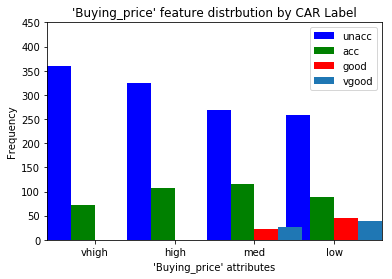

In [10]:
visualization(feature = 'Buying_price')

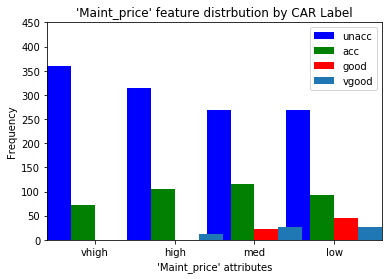

In [11]:
visualization(feature = 'Maint_price')

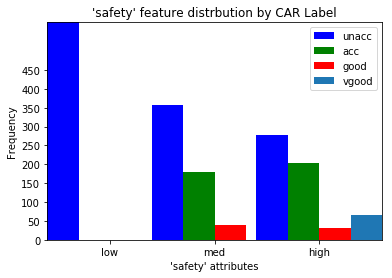

In [12]:
visualization(feature = 'safety')

In [13]:
len(data[data['Buying_price'] == data['Maint_price']]['CAR'])

432

One interesting finding with the exploratory visualization was that the frequency graph of the Maintenance price feature and Buying price feature are very similar. They both have almost equal number of same condition cars (unacceptable, acceptable, good and very good) for each of their attributes. This begs the question if both these features are performing similarly with respect to the target variable – meaning does a car with unacceptable condition have some Buying_price and Maint_price?. IF that is the case then one feature can be eliminated – Buying_price in the pre-processing step which can significantly improve the performance of the  classifier and this will reduce the number of features (after one-hot encoding) and will be faster. Further analysis showed that there are only 432 rows which have some value for Buying_price and Maint_price out of the total 1728 examples. So even though the frequency of occurrence is same for these features, they do not classify the label majority of the time which means that a car with very high Buying price and unacceptable condition does not necessarily have very high Maintenance price. So both these features are important in the final classification.

In [14]:
#Prepocessing - 1: One Hot Encoding

#Splitting features and Target variable
Target_CAR = data['CAR']
features = data.drop('CAR', axis = 1)

#One Hot Encoding the Target Variable
def one_hot_encode(example):
    if example =='unacc':
        return 0
    elif example == 'acc':
        return 1
    elif example == 'good':
        return 2
    elif example == 'vgood':
        return 3
    else:
        print("Invalid entry")
CAR = Target_CAR.apply(one_hot_encode)

#Creating Dummies for features
features_final = pd.get_dummies(features)
print("Number of features after pre-processing: {}".format(len(features_final.columns)))

Number of features after pre-processing: 21


## Benchmark Model

Usually, all the cars which are sold to the junkyard is considered to be in unacceptable condition and of no use and is dismantled straightway. This is a naïve practice and can be taken as a Benchmark model for this project i.e. predicting ‘unacc’ for all the cars no matter what the price or the safety of the car is.  This is quite common in today’s market and the aim of this model is to make predictions better than the Benchmark model i.e. identify the cars which are acceptable or good or very good given certain features of the car.

Precision is given by the ratio of number of examples predicted as positive which were actually positive (True Positives) to all the number of examples predicted as positive irrespective of whether they were positive or not (True Positives + False Positives)
Recall is given by the ratio of number of examples predicted as positive which were actually positive (True Positives) to the total number of examples which were positive whether they were predicted or not (True Positives + False Negatives)


In [15]:
# Creating Benchmark Model - predicting 'unacc' (0) for all the examples 

def benchmark(value):
    return 0

Benchmark_CAR = Target_CAR.apply(benchmark)

In [16]:
#Evaluating Bench Mark Model performance

from sklearn.metrics import f1_score

benchmark_score = f1_score(CAR, Benchmark_CAR, average = 'micro' )
print("Benchmark Model F1 score = {}".format(benchmark_score))

Benchmark Model F1 score = 0.7002314814814815


In [17]:
features_final.head()

,Buying_price_high,Buying_price_low,Buying_price_med,Buying_price_vhigh,Maint_price_high,Maint_price_low,Maint_price_med,Maint_price_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [18]:
#Preprocessing - 2: Splitting into training and testing datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final, CAR, test_size = 0.2, random_state = 0)

print("Number of Training examples: {}".format(X_train.shape[0]))
print("Number of Testing examples: {}".format(X_test.shape[0]))

Number of Training examples: 1382
Number of Testing examples: 346


## Classifiers:

After the data is prepared and is ready, it will be fitted to three classifiers to do a comparison study of these three classifiers and select the classifier with the highest performance as measures on the evaluation metric – F1 score and the time to complete the classification. The three classifiers which will be used in this project are given below:

i.  Decision Tree Classifier: The Decision Tree Classifier predicts the target by asking a series of if-else questions and dividing the dataset. It’s easy to implement and the tree which was used by the classifier to predict the outcome can be visualized which gives a clear picture of how the classifier arrived at the results and this can be used to further fine-tune the model. Since this dataset has all the categorical features, Decision Tree Classifier can fit the data well and should be able to produce good predictions by optimizing the parameters and Overfitting is avoided.

ii. K-Nearest Neighbor: K-Nearest Neighbor works on the principle of finding the commonality between the features and predicting the results. For example, if the Buying price and Maintenance price of a car is high then the car is more likely unacceptable. Intuitively, these kinds of patterns exist in the data given the it’s categorical nature and K-Nearest Neighbor can find these patterns and use them to make good predictions.

iii. Gaussian Naïve Bayes: Gaussian Naïve Bayes classifier are known to perform well on classification problems with categorical datasets and limited dependencies. All the six features of this dataset are categorical and do not have then same attributes which makes them independent of each other. For this reason, Gaussian Naïve Bayes can be a good fit for this classification problem

All these three models will be fit to the dataset and evaluated based on the performance metrics as discussed above. A comparative study of the performance of these models will be done to select one classifier. The selected classifier is now refined to further improve the performance and to make sure it performs better than the Benchmark Model. In order to perform the refinement process, Grid Search CV technique will be implemented wherein the parameters of the selected model are given a range and presented in the form of a Grid. Each and every combination of the parameters is tested and evaluated and the optimum values of the parameters are given at the end which performs the best classification and has the highest metric. The prediction result of this classifier with the optimum parameters is compared with the Benchmark model using the same evaluation metric to ensure that it is performing better. The percentage improvement in performance by optimizing the parameters is also noted and reported.


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score


score_dict = {}
classifiers = [DecisionTreeClassifier(random_state = 0), GaussianNB(), KNeighborsClassifier()]
f_scores = []
def score(classifier):
    clf = classifier.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = f1_score(y_test, pred, average = 'micro' )
    return score

for classifier in classifiers:
    name = classifier.__class__.__name__
    score_dict[name] = score(classifier)
    f_scores.append(score(classifier))
    print("{} score = {}".format(name, score_dict[name]))
    

DecisionTreeClassifier score = 0.9739884393063584
GaussianNB score = 0.7687861271676302
KNeighborsClassifier score = 0.861271676300578


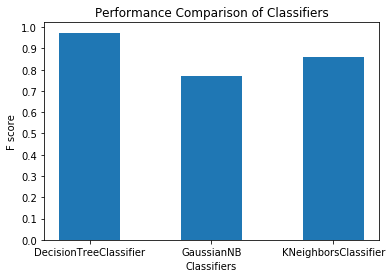

In [21]:
#Plotting the performance of Classifiers

N=3
w=0.5
x=np.arange(N)
p1 = plt.bar(x, f_scores, width = w, align = 'center')

plt.xlabel("Classifiers")
plt.title("Performance Comparison of Classifiers")
plt.ylabel("F score")
plt.xticks(x, score_dict.keys())
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()
   

## Optmizing Decision Tree Classifier

Grid Search CV technique is where all the parameters of a given classifier is given a range of values and a performance metric is created to evaluate the performance – f-score in this case. A grid object is created with the parameter values and the performance metric and is fitted to the training data set. This object takes all the combinations of the given parameter values – one at a time, fits it to the dataset and makes the predictions. The performance of the classifier is measures with each combination of the parameters and the combination which performs the best is taken and used as the final parameter values.

The parameters selected for Decision Tree Classifier are – criterion – ‘gini’ or ‘entropy’ and max_depth – range of 1 to 15.
The grid object takes one combination of parameters (criterion = ‘gini’ and max_depth  =1;criterion = ‘gini’ and max_depth = 2 and so on…..) at a time and uses those parameters in the classifier to fit to the dataset and make predictions. 

The model with the optimum parameters is finally used to make predictions and the performance is evaluated. The goal is to improve the performance of the optimum model when compared to the unoptimized initial model.


In [23]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

def scorer(y_true, pred):
    return (f1_score(y_true, pred, average = 'micro'))

classifier = DecisionTreeClassifier(random_state = 0)
unoptimized_score = score_dict['DecisionTreeClassifier']
param_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(1,15)),}
grid = GridSearchCV(classifier, param_grid, make_scorer(scorer), cv = 5)
grid = grid.fit(X_train, y_train)
optimum_parameters = grid.best_estimator_
optimum_predictions = optimum_parameters.predict(X_test)
optimized_score = scorer(y_test, optimum_predictions)
print("Unoptimized Initial score = {}".format(unoptimized_score))
print("Optimum score with best parameters = {}".format(optimized_score))
print("Improved Performance by optimizing the model by {:.2f}%".format(((optimized_score - unoptimized_score) / unoptimized_score)*100))
print("Optimum Parameters: \n {}".format(grid.best_params_))

Unoptimized Initial score = 0.9739884393063584
Optimum score with best parameters = 0.9884393063583815
Improved Performance by optimizing the model by 1.48%
Optimum Parameters: 
 {'criterion': 'entropy', 'max_depth': 13}


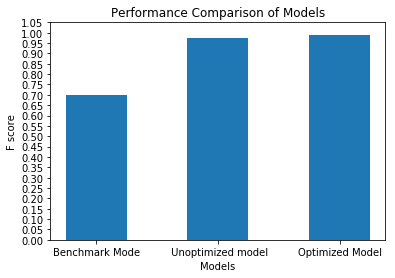

In [24]:
#Plotting and comparing all the performances

N=3
w=0.5
x=np.arange(N)
p1 = plt.bar(x, [benchmark_score, unoptimized_score, optimized_score], width = w, align = 'center')

plt.xlabel("Models")
plt.title("Performance Comparison of Models")
plt.ylabel("F score")
plt.xticks(x, ("Benchmark Mode", " Unoptimized model", "Optimized Model"))
plt.yticks(np.arange(0, 1.1, 0.05))

plt.show()

In [48]:
((pd.Series(optimum_predictions)).value_counts())[3]


9

In [39]:
y_test.value_counts()

0    240
1     79
2     17
3     10
Name: CAR, dtype: int64

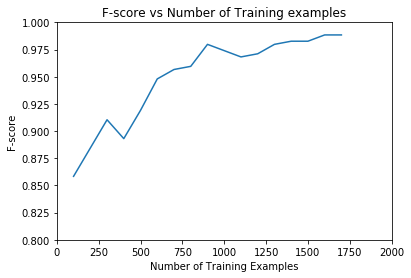

In [126]:
#Measuring performance of the model with different sample size of the training data

from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


def sample_predictions(sample_size):
    optimum_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 13)
    input_sample = X_train[:sample_size]
    CAR_sample = y_train[:sample_size]
    optimum_model = optimum_model.fit(input_sample,CAR_sample)
    sample_predictions = optimum_model.predict(X_test)
    sample_score = f1_score(sample_predictions, y_test, average = 'micro')
    return sample_score

x_values = []
y_values = []
counter = 100
while(counter <=len(CAR)):
    x_values.append(counter)
    y_values.append(sample_predictions(counter))
    counter = counter + 100
plt.plot(x_values, y_values)
plt.axis([0,2000, 0.8, 1])
plt.title("F-score vs Number of Training examples")
plt.xlabel("Number of Training Examples")
plt.ylabel("F-score")
plt.show()

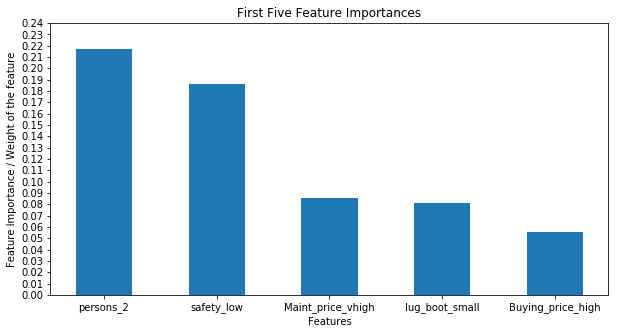

In [127]:
#Evaluating Feature Importances


optimum_model = (DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 13)).fit(X_train, y_train)
importances = optimum_model.feature_importances_

list_of_importances =  list(importances) #Creating the list of importances

descending_importances = np.sort(list_of_importances)[::-1] #Sorting in Descending Order
first_five_importances = descending_importances[:5] #Extracting the top five Importances

column_positions = []
for importance in first_five_importances:
    column_positions.append(list_of_importances.index(importance)) #Extracting the position of the top five importances in the orginal importance list
    
#print(column_positions)
columns = []
for column in column_positions:
    columns.append(X_test.columns[column]) #Extracting column names of the first five important
    
    
fig = plt.figure(1, [10, 5])
plt.bar(np.arange(5), first_five_importances, width = 0.5, align = 'center')
plt.xticks(np.arange(5), columns)
plt.yticks(np.arange(0, 0.25, 0.01))
plt.title("First Five Feature Importances")
plt.xlabel("Features")
plt.ylabel("Feature Importance / Weight of the feature")
plt.show()
    

#print(X_test.columns[7])

## Conclusion and Improvement Comments

The Decision Tree Classifier produced very good results in the beginning  without any optimization. So improving this further was quite challenging and although the final refinement by optimizing the parameters of the model is only by 1.48%, it is quite significant in the overall performance of the model

Different combinations of all the features of the Decision Tree Classifier other than max_depth were tried but the performance did not improve and it was getting computationally expensive and taking longer for the grid object to iterate over all the combinations of the parameters. Since there was no improvement in the performance (f-score),all the other features were removed and only max_depth was kept which was significant in improving the performance.

It can thought a hard-stop is reached as far hyper-parameter tuning is concerned for this project. Any further improvement in the performance of the model is possible only by collecting more data/examples which can improve the predictions as is clear from the graph of Number of training samples vs F-score where the F-score is continuously increasing and is on the upward trend.